<b><p>Student Name: EKAGRATH CHAUHAN MUDE
<P>Student ID  : ST20185077

<h1><center>Index</center></h1>
<dl>
  <dt><b>PART 2 – Geospatial Sentiment Analysis using Social Media Data.</b></dt>
    <dd><b>Task 2.1:</b> Data pre-processing.</dd>
  <dd><b>Task 2.2:</b> Polarity analysis.</dd>
    <dd><b>Task 2.3:</b> Subjectivity analysis.</dd>
  <dd><b>Task 2.4:</b> Sentiment Analysis.</dd>
  <dd><b>Task 2.5:</b> Storify/Interpretation.</dd>
</dl>

<h1><center>PART 2 – Geospatial Sentiment Analysis using Social Media Data

# Importing all required packages for the analysis

In [1]:
from warnings import filterwarnings                          # importing the filter warnings package to  remove the warnings in output
filterwarnings('ignore')                                     
import geopandas as gpd                                      # importing the geopandas for doing spatial operations 
import seaborn as sns                                        # here seaborn is used from simple heatmap visualisation
import plotly.express as px                                  # importing plotly express for doing visualizations
import pandas as pd                                          # importing pandas for doing the data manipulations 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

 # Task 2.1 :-  Data pre-processing

In [2]:
from shapely.geometry import Point,Polygon         # for zipping latitude and longitude this package is used

# Importing The Tweet data

In [3]:
tweets_data_raw= pd.read_csv("Tweets_Data.csv")
tweets_data_raw

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por √©l mismo. El dem√≥crata fue anfitri√≥n de encuentros de electores en #PembrokePines y #Miramar. Clic AQU√ç ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è\n‚†Ä\nüåêhttps://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la costa este de #EEUU\n‚†Ä‚èπÔ∏è Facebook e Instagram\n‚†ÄüèôÔ∏è Philadelphia: /elsollatinonewspaper\n‚†ÄüåÖ Miami: /elsollatinonewsmiami,...,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00
1,15/10/2020 00:00,1.320000e+18,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden¬† #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26,9,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie sul sito https://t.co/sC5iMbymSN e sul canale 51 del digitale terrestre,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4
2,15/10/2020 00:00,1.320000e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7
3,15/10/2020 00:00,1.320000e+18,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0,0,Trumpytweeter,8.280000e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we be worried?",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1
4,15/10/2020 00:00,1.320000e+18,You get a tie! And you get a tie! #Trump ‚Äòs rally #Iowa https://t.co/jJalUUmh5D,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±ŸÜÿß ÿ£ÿ®ÿ™ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15/10/2020 00:28,1.320000e+18,‚ÄúAll that shit I didn‚Äôt try to do for the first 4 years and the Republicans have not tried to do for 40? That‚Äôs what I‚Äôll do starting after the election.‚Äù -#Trump,0,0,Twitter for iPhone,1.611913e+07,DK DeKay,HairlessComic,(he/him) I‚Äôm the Michael Jordan of not living up to my potential. #DisarmPolice #DisbandDHS #DefundTheMilitary,...,317,Vermont,44.599072,-72.500261,NaN,United States of America,North America,Vermont,VT,03:06.6
496,15/10/2020 00:28,1.320000e+18,Pretty certain Laura Branigan is turning in her grave right now.... #trump #iowa #COVID19 #COVIDIOTS https://t.co/Pvm9Gw3SWl,0,0,Twitter for iPhone,4.857446e+08,James,joon0u,Be the change you wish to see in the world.,...,88,NYC,40.712728,-74.006015,New York,United States of America,North America,New York,NY,03:07.0
497,15/10/2020 00:28,1.320000e+18,#Trump: Do we have time for one quick story--\n\nCrowd: *cheers*\n\nMe: NOOOOOOOOO,0,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,03:07.4
498,15/10/2020 00:28,1.320000e+18,@funder #Trump #TrumpsTheBiggestLiarEver,0,0,Twitter for iPhone,4.021990e+08,debbie gore,debbie_gore,NaN,...

# Data Information

In [4]:
tweets_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            500 non-null    object 
 1   tweet_id              500 non-null    float64
 2   tweet                 500 non-null    object 
 3   likes                 500 non-null    int64  
 4   retweet_count         500 non-null    int64  
 5   source                499 non-null    object 
 6   user_id               500 non-null    float64
 7   user_name             500 non-null    object 
 8   user_screen_name      500 non-null    object 
 9   user_description      448 non-null    object 
 10  user_join_date        500 non-null    object 
 11  user_followers_count  500 non-null    int64  
 12  user_location         371 non-null    object 
 13  lat                   279 non-null    float64
 14  long                  279 non-null    float64
 15  city                  1

Next step is combining the latitude and longitude into one column called geometry. And then saving into GEODataFrame having CRS=4326

In [5]:
tweets_data_raw['geometry']= [Point(xy) for xy in zip(tweets_data_raw['long'],tweets_data_raw['lat'])]
tweets_data_raw= gpd.GeoDataFrame(tweets_data_raw,geometry=tweets_data_raw.geometry,crs= "epsg:4326")
tweets_data_raw.to_file('tweets_data_raw_gdf.shp')

Normalized/laundered field name: 'retweet_count' to 'retweet_co'
Normalized/laundered field name: 'user_screen_name' to 'user_scree'
Normalized/laundered field name: 'user_description' to 'user_descr'
Normalized/laundered field name: 'user_join_date' to 'user_join_'
Normalized/laundered field name: 'user_followers_count' to 'user_follo'
Normalized/laundered field name: 'user_location' to 'user_locat'
Normalized/laundered field name: 'collected_at' to 'collected_'
Value 1.32e+18 of field tweet_id of feature 0 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value '#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por √©l mismo. El dem√≥crata fue anfitri√≥n de encuentros de electores en #PembrokePines y #Miramar. Clic AQU√ç ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è
‚†Ä
üåêhttps://t.co/qhIWpIUXsT
_
#ElSolLatino #yobri

Value 1.31e+18 of field user_id of feature 23 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 24 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 240532719 of field user_id of feature 24 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 25 not successfully written. Possibly due to too larger number with respect to field width
Value 1010405455 of field user_id of feature 25 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 26 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from 

One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 240532719 of field user_id of feature 49 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 50 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 51 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.01e+18 of field user_id of feature 51 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 52 not successfully written. Possibl

Value 1.32e+18 of field tweet_id of feature 75 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 76 not successfully written. Possibly due to too larger number with respect to field width
Value 628914542 of field user_id of feature 76 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 77 not successfully written. Possibly due to too larger number with respect to field width
Value 1.29e+18 of field user_id of feature 77 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 78 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 120969408 of field user_id of feature 78 not successfully 

Value 1.32e+18 of field tweet_id of feature 103 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 104 not successfully written. Possibly due to too larger number with respect to field width
Value 1.16e+18 of field user_id of feature 104 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 105 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field user_id of feature 105 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 106 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly f

One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 129 not successfully written. Possibly due to too larger number with respect to field width
Value 3140683843 of field user_id of feature 129 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 130 not successfully written. Possibly due to too larger number with respect to field width
Value 722709722 of field user_id of feature 130 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 131 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.27e+18 of field user_id of feature 131 not successfully w

Value 864000000000000000 of field user_id of feature 155 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 156 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1241149884 of field user_id of feature 156 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 157 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 2657394641 of field user_id of feature 157 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 158 not suc

Value 955000000000000000 of field user_id of feature 181 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 182 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 2579544518 of field user_id of feature 182 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 183 not successfully written. Possibly due to too larger number with respect to field width
Value 102398751 of field user_id of feature 183 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 184 not succ

Value 1.32e+18 of field tweet_id of feature 208 not successfully written. Possibly due to too larger number with respect to field width
Value 412036425 of field user_id of feature 208 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 209 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 210 not successfully written. Possibly due to too larger number with respect to field width
Value 3024400694 of field user_id of feature 210 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 211 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctl

One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 236 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 237 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 302984766 of field user_id of feature 237 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 238 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 979000000000000000 of field user_id of feature 238 not successfully w

One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 247415995 of field user_id of feature 261 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 262 not successfully written. Possibly due to too larger number with respect to field width
Value 138870199 of field user_id of feature 262 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 263 not successfully written. Possibly due to too larger number with respect to field width
Value 1.24e+18 of field user_id of feature 263 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 264 not successfully wr

Value 1.32e+18 of field tweet_id of feature 288 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 289 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.28e+18 of field user_id of feature 289 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 290 not successfully written. Possibly due to too larger number with respect to field width
Value 1.24e+18 of field user_id of feature 290 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8

Value 1.32e+18 of field tweet_id of feature 314 not successfully written. Possibly due to too larger number with respect to field width
Value 1.23e+18 of field user_id of feature 314 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 315 not successfully written. Possibly due to too larger number with respect to field width
Value 730000000000000000 of field user_id of feature 315 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 316 not successfully written. Possibly due to too larger number with respect to field width
Value 1.24e+18 of field user_id of feature 316 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 317 no

One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.3e+18 of field user_id of feature 339 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 340 not successfully written. Possibly due to too larger number with respect to field width
Value 1.3e+18 of field user_id of feature 340 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 341 not successfully written. Possibly due to too larger number with respect to field width
Value 196770089 of field user_id of feature 341 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 342 not successfully writt

Value 1.26e+18 of field user_id of feature 367 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 368 not successfully written. Possibly due to too larger number with respect to field width
Value 383848255 of field user_id of feature 368 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 369 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 370 not successfully written. Possibly due to too larger number with respect to field width
Value 114283862 of field user_id of feature 370 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 371 not succes

Value 1.32e+18 of field tweet_id of feature 396 not successfully written. Possibly due to too larger number with respect to field width
Value 1.21e+18 of field user_id of feature 396 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 397 not successfully written. Possibly due to too larger number with respect to field width
Value 167415857 of field user_id of feature 397 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 398 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 399 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly 

Value 2612213790 of field user_id of feature 423 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 424 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.01e+18 of field user_id of feature 424 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 425 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 3096665071 of field user_id of feature 425 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 426 not successfully 

Value 1.32e+18 of field tweet_id of feature 450 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 451 not successfully written. Possibly due to too larger number with respect to field width
Value 476388891 of field user_id of feature 451 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 452 not successfully written. Possibly due to too larger number with respect to field width
Value 1.18e+18 of field user_id of feature 452 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 453 not successfully wr

Value 1.32e+18 of field tweet_id of feature 477 not successfully written. Possibly due to too larger number with respect to field width
Value 901000000000000000 of field user_id of feature 477 not successfully written. Possibly due to too larger number with respect to field width
Value 1.32e+18 of field tweet_id of feature 478 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 479 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly from UTF-8 to ISO-8859-1.  This warning will not be emitted anymore.
Value 1.32e+18 of field tweet_id of feature 480 not successfully written. Possibly due to too larger number with respect to field width
One or several characters couldn't be converted correctly

# Plotting country shapes

<div style="background-color:powderblue;">
<p style="color:grey;"><I><b>The predefined data frame is taken from the Geopandas for each country shapes and geometry points which are used as underlayer while ploting the data according the analysis.  </p></b>

In [6]:
Contries_shapes_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))         
Contries_shapes_df

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

<AxesSubplot:>

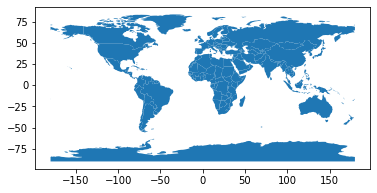

In [7]:
Contries_shapes_df.plot()

# Checking CRS

<div style="background-color:powderblue;">
<p><b>The two data frames should be plotted on each other, so crs should be same for both data frames.</b>

In [8]:
Contries_shapes_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
tweets_data_raw_gdf=gpd.read_file('tweets_data_raw_gdf.shp')
tweets_data_raw_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plotting Tweet data without Country Shapes

<AxesSubplot:>

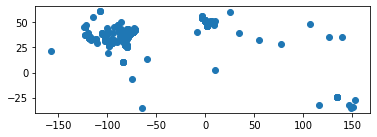

In [10]:
tweets_data_raw_gdf.plot()

<div style="background-color:powderblue;">
<p><b>Here in next step,
<p>Removing URLS, 
<p>Declaring Emojies codes and removing emojies,
<p>Calculating the polarity,
<p>Calculating the Subjectivity,
<p>From Polarity values calculating Sentiment Values, if polarity is negative value then tweets are negative or if polarity is in positive value then tweets become positive.
<p>Those sentiment values are returned to tweets dataframe.</b>

In [11]:
from textblob import TextBlob  
import re   

def filtering_tweets(Tweets_posted):
    Removing_urls=re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "",Tweets_posted)
    Removing_emotes_codes= re.compile("["u"\U0001F1E0-\U0001F1FF"u"\U0001F300-\U0001F5FF"
                                         u"\U0001F600-\U0001F64F"u"\U0001F680-\U0001F6FF"
                                "]+", flags=re.UNICODE)
    cleaned_tweets=Removing_emotes_codes.sub(r'', Removing_urls)
    polarity_counted = TextBlob(cleaned_tweets).sentiment[0]
    subjectivity_counted = TextBlob(cleaned_tweets).sentiment[1]
    if polarity_counted < 0:
        sentiment_value= 'Negative'
    elif polarity_counted == 0:
        sentiment_value= 'Neutral'
    else:
        sentiment_value= 'Positive'
    return pd.Series([subjectivity_counted,polarity_counted,sentiment_value])
tweets_data_raw_gdf[['subjectivity','polarity','SENTIMENT']]=tweets_data_raw_gdf['tweet'].apply(filtering_tweets)

In [12]:
tweets_data_raw_gdf

,created_at,tweet_id,tweet,likes,retweet_co,source,user_id,user_name,user_scree,user_descr,...,city,country,continent,state,state_code,collected_,geometry,subjectivity,polarity,SENTIMENT
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por ?©l mismo. El dem??crata fue anfitri??n de encuentros de electores en #PembrokePines y #Miramar. Clic AQU?ç ?¨áÔ?è?¨áÔ?è?¨áÔ?è\n??Ä\n?üåêhttps://t.co/qhIWpIUXsT\n_\n#ElSolLat,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,?üåê Noticias de inter?©s para latinos de la costa este de #EEUU\n??Ä?è?Ô?è Facebook e Instagram\n??Ä?üèôÔ?è Philadelphia: /elsollatinonewspaper\n??Ä?üåÖ Miami: /elsollatinonewsmiami,...,None,United States of America,North America,Florida,FL,21/10/2020 00:00,POINT (-80.19366 25.77427),0.000000,0.000000,Neutral
1,15/10/2020 00:00,1.320000e+18,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden¬? #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26,9,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie sul sito https://t.co/sC5iMbymSN e sul canale 51 del digitale terrestre,...,None,None,None,None,None,00:00.4,None,0.000000,0.000000,Neutral
2,15/10/2020 00:00,1.320000e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,Portland,United States of America,North America,Oregon,OR,00:00.7,POINT (-122.67419 45.52025),0.333333,0.333333,Positive
3,15/10/2020 00:00,1.320000e+18,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0,0,Trumpytweeter,8.280000e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we be worried?",...,None,None,None,None,None,00:01.1,None,0.252222,0.076667,Positive
4,15/10/2020 00:00,1.320000e+18,You get a tie! And you get a tie! #Trump ?Äòs rally #Iowa https://t.co/jJalUUmh5D,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±?Üÿß ÿ£ÿ®ÿ?ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",...,Washington,United States of America,North America,District of Columbia,DC,00:01.5,POINT (-77.03656 38.89499),0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15/10/2020 00:28,1.320000e+18,?ÄúAll that shit I didn?Äôt try to do for the first 4 years and the Republicans have not tried to do for 40? That?Äôs what I?Äôll do starting after the election.?Äù -#Trump,0,0,Twitter for iPhone,1.611913e+07,DK DeKay,HairlessComic,(he/him) I?Äôm the Michael Jordan of not living up to my potential. #DisarmPolice #DisbandDHS #DefundTheMilitary,...,None,United States of America,North America,Vermont,VT,03:06.6,POINT (-72.50026 44.59907),0.411111,0.016667,Positive
496,15/10/2020 00:28,1.320000e+18,Pretty certain Laura Branigan is turning in her grave right now.... #trump #iowa #COVID19 #COVIDIOTS https://t.co/Pvm9Gw3SWl,0,0,Twitter for iPhone,4.857446e+08,James,joon0u,Be the change you wish to see in the world.,...,New York,United States of America,North America,New York,NY,03:07.0,POINT (-74.00602 40.71273),0.702381,0.250000,Positive
497,15/10/2020 00:28,1.320000e+18,#Trump: Do we have time for one quick story--\n\nCrowd: *cheers*\n\nMe: NOOOOOOOOO,0,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,Portland,United States of America,North America,Oregon,OR,03:07.4,POINT (-122.67419 45.52025),0.500000,0.333333,Positive
498,15/10/2020 00:28,1.320000e+18,@funder #Trump #TrumpsTheBiggestLiarEver,0,0,T

 # Task 2.2 :- Polarity analysis


<AxesSubplot:title={'center':'POLARITY'}>

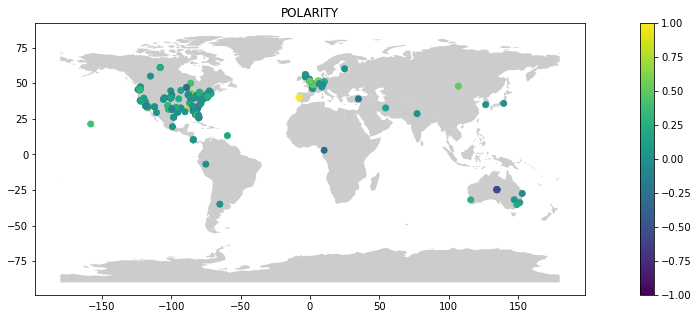

In [13]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(20,5))
plt.title('POLARITY')
Contries_shapes_df.plot(ax=ax,alpha=0.4,color='grey',categorical=True)  #ploting countries shapes
tweets_data_raw_gdf.plot(ax=ax,column='polarity',legend=True)           # plotting the data on country shapes data

<AxesSubplot:title={'center':'Plotting Polarity values using Histogram'}, ylabel='Frequency'>

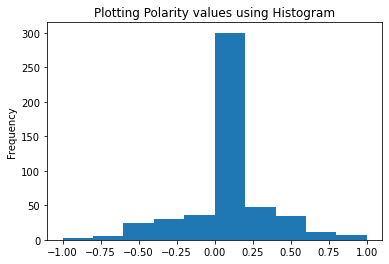

In [14]:
plt.title('Plotting Polarity values using Histogram')
tweets_data_raw_gdf['polarity'].plot.hist()      # Plotting the histogram for polarity values from tweets

<div style="background-color:powderblue;"><h3>Analysis</h3>
<p style = "color:grey;"><I><h5>Intro:</h5>This graph is having Polarity of 500 tweets on Donald Trump during his presidential campaign is provided.
    <h5>Interpretation:</h5> The Data is on polarity values which decides the sentiment value of the tweet. Value of polarity is calculated from -1 to +1, most of the tweets are having values near to neutral values which are near to zero, on the choropleth map value near to zero are from United states, are most positive values are present in histogram than negative tweets where sentiment values are calculated in next step.

# Task 2.3 :-  Subjectivity analysis


<AxesSubplot:title={'center':'SUBJECTIVITY'}>

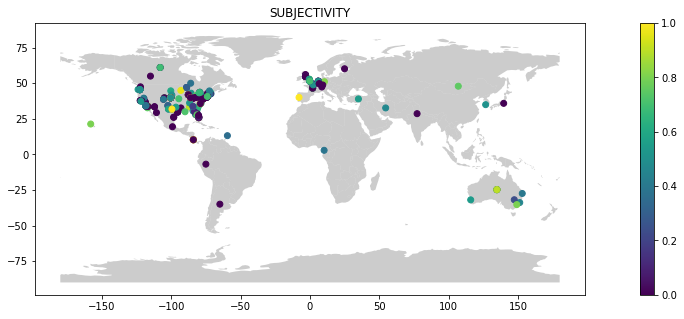

In [15]:
fig,ax= plt.subplots(figsize=(20,5)) 
plt.title('SUBJECTIVITY')
Contries_shapes_df.plot(ax=ax,alpha=0.4,color='grey',categorical=True)        # plotting countries shapes 
tweets_data_raw_gdf.plot(ax=ax,column='subjectivity',legend=True)              # plotting Subjectivity values using geometry

<AxesSubplot:title={'center':'Plotting Subjectivity values using Histogram'}, ylabel='Frequency'>

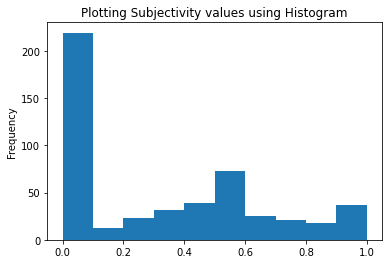

In [16]:
plt.title('Plotting Subjectivity values using Histogram')
tweets_data_raw_gdf['subjectivity'].plot.hist() #plotting the histogram for subjectivity.

<div style="background-color:powderblue;"><h3>Analysis</h3>
<p style = "color:grey;"><I>The data is from subjectivity perspective is shown from value 0 to 1, the value towards one will become subjective tweet that is having more personal judgment inside tweet which makes disturbance in sentiment analysis.
 In here tweets are towards zero which gives us result of the information in this analysis, total number of tweets are 500 but nearly 250 tweets, 50% of tweets are having subjective judgmental feeling and other 50 % of the tweets are having information or reactions, tweets towards zero are more than tweets towards one which gives a positive result in terms of factual response from tweets.

#  Task 2.4 :- Sentiment analysis


<AxesSubplot:title={'center':'SENTIMENT'}>

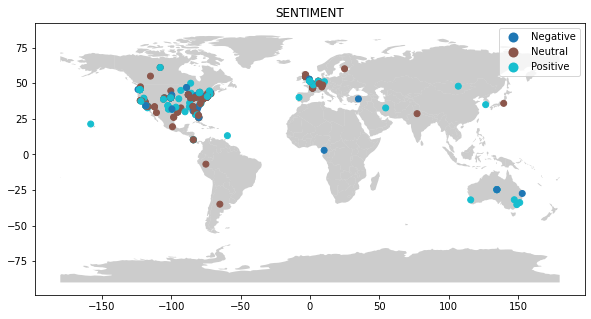

In [17]:
fig,ax= plt.subplots(figsize=(20,5)) # Plotting  chloropleth map for sentiment analysis.
plt.title('SENTIMENT')
Contries_shapes_df.plot(ax=ax,alpha=0.4,color='grey',categorical=True)  # plotting country shapes
tweets_data_raw_gdf.plot(ax=ax,column='SENTIMENT',legend=True)      # plotting Sentiment values on country shapes

(array([232.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0., 100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

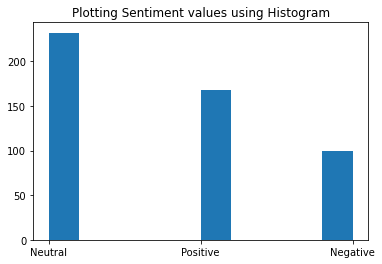

In [18]:
plt.title('Plotting Sentiment values using Histogram')  # Plotting histogram for the sentiment analysis using pandas plot.
plt.hist(tweets_data_raw_gdf['SENTIMENT'])

# Task 2.5 :-  Storify/Interpretation 

<div style="background-color:powderblue;"><h3>Analysis</h3>
<p style = "color:grey;"><I><b>This Sentiment analysis is done from the pre-given dataset containing 500 tweets those tweets are plotted according to analysis, from the polarity values the of sentiment is calculated and given the information of positive, negative, and neutral tweets data. Here in this analysis the neutral tweets are more than 200 and positive tweets are between 150 and 200, lastly negative tweets are nearly 100. Which gives us opinion that Donald Trump is having 80% of chance of winning this presidential campaign. Where most of tweets are taken from United States of America as we can see on choropleth map is plotted using tweeter users’ location from the dataset. From plotting 50% those negative tweets can be negligible which are from outside the United States, which gives are most of opportunity getting positivity inside united states, where the election is only taking place. Positive Subjectivity of tweets helps to get more amount of influence on election results than factual opinion, where voters are public.</b>